## 範例重點
* 學習如何在 keras 中加入 BatchNorm
* 知道有無 BN 對訓練的影響
* 比較 BN 在不同 batch size 下的效果

In [1]:
import os
from tensorflow import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization(axis=1)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization(axis=1)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
tf.math.multiply (TFOpLambda (None, 512)               0         
_________________________________________________________________
tf.__operators__.add (TFOpLa (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
tf.math.multiply_1 (TFOpLamb (None, 256)               0         
_________________________________________________________________
tf.__operators__.add_1 (TFOp (None, 256)               0     

C:\Users\loe_lin\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
49/49 [==============================] - 2s 35ms/step - loss: 2.2348 - accuracy: 0.1857 - val_loss: 2.1393 - val_accuracy: 0.2515
Epoch 2/50
49/49 [==============================] - 2s 31ms/step - loss: 2.0581 - accuracy: 0.2706 - val_loss: 1.9892 - val_accuracy: 0.2990
Epoch 3/50
49/49 [==============================] - 2s 33ms/step - loss: 1.9459 - accuracy: 0.3139 - val_loss: 1.9124 - val_accuracy: 0.3199
Epoch 4/50
49/49 [==============================] - 2s 33ms/step - loss: 1.8839 - accuracy: 0.3389 - val_loss: 1.8610 - val_accuracy: 0.3462
Epoch 5/50
49/49 [==============================] - 2s 33ms/step - loss: 1.8397 - accuracy: 0.3574 - val_loss: 1.8240 - val_accuracy: 0.3623
Epoch 6/50
49/49 [==============================] - 2s 34ms/step - loss: 1.8054 - accuracy: 0.3693 - val_loss: 1.7942 - val_accuracy: 0.3724
Epoch 7/50
49/49 [==============================] - 2s 33ms/step - loss: 1.7782 - accuracy: 0.3776 - val_loss: 1.7700 - val_accuracy: 0.3781
Epoch 8/50
49

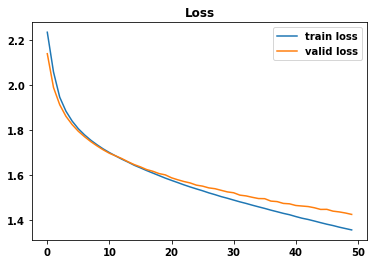

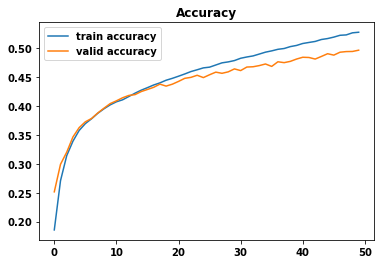

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果